# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [110]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# Create two new dataframes
north_df=pd.read_csv('NorthCallCenter.csv')

south_df=pd.read_csv('SouthCallCenter.csv')

south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [74]:
#Code Used:
north_df['Rep ID'].drop_duplicates().count()


9

#### EDA Question 1B:  How many reps are in the South branch?  

In [75]:
#Code Used:

south_df['Rep ID'].drop_duplicates().count()

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [76]:
#Code Used:
'Busy Minutes - '+ str(north_df['Busy Minutes'].mean().round(2)),'Not Ready Minutes - '+str( north_df['Not Ready Minutes'].mean().round(2)),'Incoming Wait Time  - ' + str(north_df['Incoming Wait Time'].mean().round(2)),'During Call Wait Time - ' + str(north_df['During Call Wait Time'].mean().round(2)) 

('Busy Minutes - 9.99',
 'Not Ready Minutes - 1.91',
 'Incoming Wait Time  - 3.05',
 'During Call Wait Time - 2.97')

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [78]:
#Code Used:
'Busy Minutes - '+ str(south_df['Busy Minutes'].mean().round(2)),'Not Ready Minutes - '+str( south_df['Not Ready Minutes'].mean().round(2)),'Incoming Wait Time  - ' + str(south_df['Incoming Wait Time'].mean().round(2)),'During Call Wait Time - ' + str(south_df['During Call Wait Time'].mean().round(2)) 


('Busy Minutes - 10.05',
 'Not Ready Minutes - 1.91',
 'Incoming Wait Time  - 3.0',
 'During Call Wait Time - 3.08')

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [79]:
# Code Used:
Callcenters=[north_df,south_df]

df=pd.concat(Callcenters)
df
df.groupby('Time Block').sum()




C:\Users\kavit\AppData\Local\Temp\ipykernel_14340\2149193057.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Time Block').sum()


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Time Block,,,,,,,,
10:00 AM,10665,4,4,994,194,103.0,303,99
11:00 AM,6796,2,1,565,100,54.0,166,56
12:00 PM,17020,3,1,1202,225,135.0,364,120
1:00 PM,5363,1,0,399,75,38.0,115,40
2:00 PM,9957,0,1,643,124,82.0,197,65
3:00 PM,11674,0,1,736,132,94.0,219,73
4:00 PM,8743,0,1,528,109,66.0,163,53
5:00 PM,8031,2,0,437,90,43.0,134,43
9:00 AM,782,4,2,100,20,13.0,32,10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.987755102040817
> - Not Ready Minutes = 1.9142857142857144
> - Incoming Wait Time = 3.048780487804878
> - During Call Wait Time = 2.9673469387755103
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.054140127388536
> - Not Ready Minutes = 1.910828025477707
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.0764331210191083
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: In incoming wait time column ( in both data set) there are some missing datas.As the missing datas are the outgoing we dont have to replace it with anything.

In [80]:
# Code Used
north_df.shape,south_df.shape
# Add Additional Cells as needed.


((245, 15), (314, 15))

In [81]:
#checking duplicate rows
duplicate_rows_north=north_df[north_df.duplicated()]

print("number of duplicated rows :  ",duplicate_rows_north.shape[0])

number of duplicated rows :   0


In [82]:

total_cells = np.product(north_df.shape)

missing_cells = pd.isnull(north_df).sum()

total_missing = missing_cells.sum()

percentage_missing = round((total_missing/total_cells), 2) *100

print(percentage_missing, "% Missing cells from the data") 

4.0 % Missing cells from the data


In [83]:
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))

Unnamed: 0 - 0.0%
Branch - 0.0%
Call Purpose - 0.0%
Time Block - 0.0%
Incoming or Outgoing - 0.0%
Queue - 0.0%
Rep ID - 0.0%
Sale - 0.0%
Lost Call - 0.0%
Abandoned - 0.0%
Busy Minutes - 0.0%
Not Ready Minutes - 0.0%
Incoming Wait Time - 66.53%
During Call Wait Time - 0.0%
Calls - 0.0%


In [118]:

#north_df.groupby(['Incoming or Outgoing']).count()

In [84]:
south_df.shape

(314, 15)

In [85]:
duplicate_rows_south=north_df[south_df.duplicated()]

print("number of duplicated rows in south data:  ",duplicate_rows_south.shape)

number of duplicated rows in south data:   (0, 15)


C:\Users\kavit\AppData\Local\Temp\ipykernel_14340\2065791067.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicate_rows_south=north_df[south_df.duplicated()]


In [86]:

total_cells = np.product(south_df.shape)

missing_cells = pd.isnull(south_df).sum()

total_missing = missing_cells.sum()

percentage_missing = round((total_missing/total_cells), 2) *100

print(percentage_missing, "% Missing cells from the data") 

4.0 % Missing cells from the data


In [87]:
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [63]:

#south_df.groupby(['Incoming or Outgoing']).count()

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: When I tried groupby Sale and did the count(),I could see there were 2 'YES',one with count 10 and one with count 1.Both were looking exactly the same so I tried strip on it to remove the white space.
If we do not fix this it will effect the count.

In [88]:
#Code Used
# Add Additional Cells as needed.

north_df['Sale']=north_df['Sale'].str.strip()
north_df.groupby(['Sale']).count()
            

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Sale,,,,,,,,,,,,,,
NO,234,234,234,234,234,234,234,234,234,234,234,77,234,234
YES,11,11,11,11,11,11,11,11,11,11,11,5,11,11


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: No duplicate rows.

In [89]:
#Code Used
#checking duplicate rows
duplicate_rows_north=north_df[north_df.duplicated()]

print("number of duplicated rows :  ",duplicate_rows_north.shape[0])
# Add Additional Cells as needed.

number of duplicated rows :   0


In [90]:
duplicate_rows_south=north_df[south_df.duplicated()]

print("number of duplicated rows in south data:  ",duplicate_rows_south.shape[0])

number of duplicated rows in south data:   0


C:\Users\kavit\AppData\Local\Temp\ipykernel_14340\4256591798.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicate_rows_south=north_df[south_df.duplicated()]


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: When I took the count of Lost call from both data sets,I feel like ,the missed  calls are negligible.So I have decided to mark this as unneccessary data.

In [91]:
#Code Used
# Add Additional Cells as needed.
north_df.groupby(['Lost Call']).count()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Lost Call,,,,,,,,,,,,,,
0,240,240,240,240,240,240,240,240,240,240,240,81,240,240
1,5,5,5,5,5,5,5,5,5,5,5,1,5,5


In [92]:
south_df.groupby(['Lost Call']).count()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Lost Call,,,,,,,,,,,,,,
0,303,303,303,303,303,303,303,303,303,303,303,125,303,303
1,11,11,11,11,11,11,11,11,11,11,11,1,11,11


In [93]:

north_df=north_df.drop(columns='Lost Call')
north_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,11,2,NaN,2,1


In [94]:
to_drop=['Lost Call']
south_df=south_df.drop(columns=to_drop)
south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,10,1,NaN,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [111]:
# Create dataframe for the entire company named df
frames=[north_df,south_df]
df=pd.concat(frames)
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [96]:
duplicate_rows_data = df[df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_data.shape)
df.shape

Number of duplicated rows:  (0, 14)


(559, 14)

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent  Total calls 37
- South Branch = Eric   Total calls 35


In [97]:
# Code Used
# Add Additional Cells as needed.
north_df.groupby(['Rep ID']).sum().sort_values(by='Calls',ascending=False)

C:\Users\kavit\AppData\Local\Temp\ipykernel_14340\2031741928.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  north_df.groupby(['Rep ID']).sum().sort_values(by='Calls',ascending=False)


,Unnamed: 0,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Brent,4840,1,362,71,17.0,117,37
Lilly,3375,2,307,59,37.0,88,30
Duke,2999,0,292,56,39.0,85,29
Todd,4252,0,296,58,21.0,97,29
Joe,3178,0,256,49,36.0,81,26
Cam,2746,0,233,46,32.0,66,24
Xander,3340,0,244,44,20.0,68,24
Amanda,2666,1,229,43,12.0,60,23
Andy,2494,3,228,43,36.0,65,23


In [98]:
south_df.groupby(['Rep ID']).sum().sort_values(by='Calls',ascending=False)

C:\Users\kavit\AppData\Local\Temp\ipykernel_14340\1034072294.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  south_df.groupby(['Rep ID']).sum().sort_values(by='Calls',ascending=False)


,Unnamed: 0,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Eric,5039,0,361,54,47.0,112,35
Randy,4576,1,320,66,47.0,98,33
Sandy,4694,0,325,60,34.0,100,32
Helga,5236,2,292,58,36.0,95,31
George,4620,0,298,53,41.0,87,29
Kate,4615,0,291,61,37.0,83,29
Karl,4532,0,287,61,26.0,85,28
Josh,3960,0,260,50,31.0,83,26
Susan,4006,0,267,53,35.0,88,26


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%?    Yes North is falling in this range.

In [99]:
# Code Used
# Add Additional Cells as needed
mean_df=df.groupby(['Branch']).mean()
percentage=round(mean_df['Abandoned']*100,2)
percentage


C:\Users\kavit\AppData\Local\Temp\ipykernel_14340\3267217119.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df=df.groupby(['Branch']).mean()


Branch
North    2.86
South    1.27
Name: Abandoned, dtype: float64

In [100]:
Company_mean=df.mean()
Company_mean_per=round(Company_mean['Abandoned']*100,2)
Company_mean_per

C:\Users\kavit\AppData\Local\Temp\ipykernel_14340\3137019707.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Company_mean=df.mean()


1.97

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%  No.of calls 33
- South Branch = 38.1%  No.of calls  48
- Company Wide = 38.94%  No.of calls 81

In [112]:
total_calls_north = (north_df["Incoming or Outgoing"] == "Incoming").sum()
total_calls_north

82

In [119]:

north_sum=(north_df['Incoming Wait Time']<=2).sum()
north_sum

33

In [114]:
# Code Used
# Add Additional Cells as needed.

north_percentage=round((north_sum/total_calls_north)*100,2)
north_percentage

40.24

In [104]:
total_calls_south = (south_df["Incoming or Outgoing"] == "Incoming").sum()
total_calls_south

126

In [105]:
south_sum=(south_df['Incoming Wait Time']<=2).sum()
south_percentage=round((south_sum/total_calls_south)*100,2)
south_percentage

38.1

In [121]:
south_sum=(south_df['Incoming Wait Time']<=2).sum()
south_sum

48

In [106]:
total_calls=(df['Incoming or Outgoing']=='Incoming').sum()
total_calls

208

In [107]:
df_sum=(df['Incoming Wait Time']<=2).sum()
df_percentage=round((df_sum/total_calls)*100,2)
df_percentage

38.94

In [122]:
df_sum

81

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.02


In [108]:
total_calls_north = (north_df["Incoming or Outgoing"] == "Incoming").sum()

north_wait_sum=north_df['Incoming Wait Time'].sum()
# total_calls_in["Incoming or Outgoing"].value_counts()
north_avg_speed = (north_wait_sum/total_calls_north).round(2)
north_avg_speed

3.05

In [109]:
total_calls_south=(south_df["Incoming or Outgoing"]=="Incoming").sum()
south_wait_sum=south_df['Incoming Wait Time'].sum()

south_avg_speed=round(south_wait_sum/total_calls_south,2)
south_avg_speed

3.0

In [53]:
# Code Used 
total_calls=(df['Incoming or Outgoing']=='Incoming').sum()
df_wait_sum=df['Incoming Wait Time'].sum()
df_avg_speed=round(df_wait_sum/total_calls,2)
df_avg_speed

3.02

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

In [54]:
north_total_calls=(north_df['Incoming or Outgoing']=='Incoming').sum()
north_sum_df=df.groupby(['Queue']).sum()
north_sum_df

north_abandonment_rate=round(north_sum_df['Abandoned']/north_total_calls*100,2) 
north_abandonment_rate


C:\Users\kavit\AppData\Local\Temp\ipykernel_14340\3057435372.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  north_sum_df=df.groupby(['Queue']).sum()


Queue
A    4.88
B    3.66
C    1.22
D    3.66
Name: Abandoned, dtype: float64

In [55]:
south_total_calls=(df['Incoming or Outgoing']=='Incoming').sum()
south_sum_df=south_df.groupby(['Queue']).sum()
south_sum_df

south_abandonment_rate=round(south_sum_df['Abandoned']/south_total_calls*100,2) 
south_abandonment_rate


C:\Users\kavit\AppData\Local\Temp\ipykernel_14340\3222054099.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  south_sum_df=south_df.groupby(['Queue']).sum()


Queue
C    0.48
D    1.44
Name: Abandoned, dtype: float64

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:
A    4.17%
B    2.01%
C    .72%
D    1.70%

> Chart style you chose and why: I am using barchart as it amkes comparison easy.

In [56]:
#total_calls=(df['Incoming or Outgoing']=='Incoming').sum()
sum_df=df.groupby(['Queue']).sum()
sum_df

abandonment_rate=round(sum_df['Abandoned']/sum_df['Calls']*100,2) 
abandonment_rate



C:\Users\kavit\AppData\Local\Temp\ipykernel_14340\1933046690.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_df=df.groupby(['Queue']).sum()


Queue
A    4.17
B    2.01
C    0.72
D    1.70
dtype: float64

C:\Users\kavit\AppData\Local\Temp\ipykernel_14340\3035696594.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


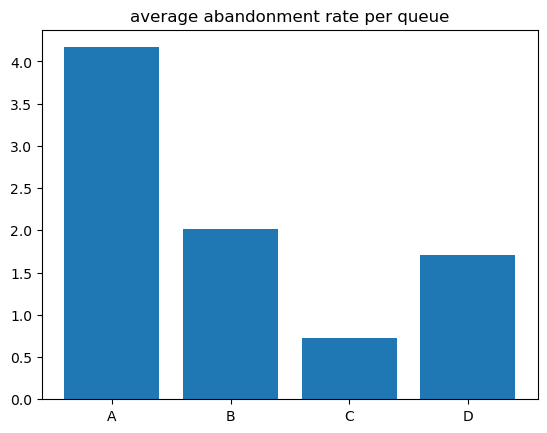

In [57]:
# Create visualization 1 here
# Import any additional libraries needed with alias
# import numpy as np
# import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i])*100

#Your Code Here:
x=list(abandonment_rates.keys())
y=list(abandonment_rates.values())


plt.title('average abandonment rate per queue')
plt.bar(x,y)
plt.xlabel='Queue'
plt.ylabel='Abandoned'
plt.show()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:


> Chart style you chose and why: Using bar chart as it makes comparison easy.

In [58]:
north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()


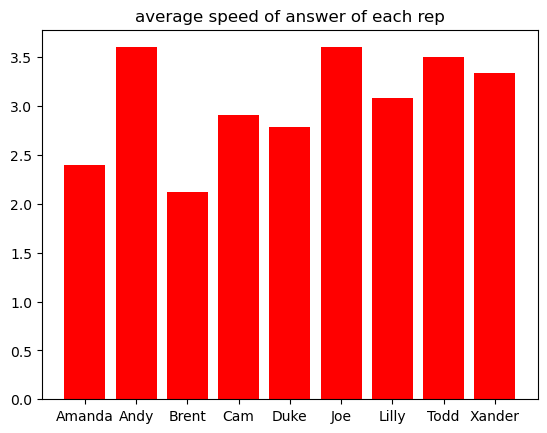

In [59]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
north_plt
# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]

quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table
quick_stats

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID").reset_index()

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level

# #Your Code Here:
plt.title('average speed of answer of each rep')
plt.bar(north_plt['Rep ID'], north_plt['Incoming Wait Time'], color = 'red')


plt.show()

Text(0.5, 1.0, 'The service level Percentage')

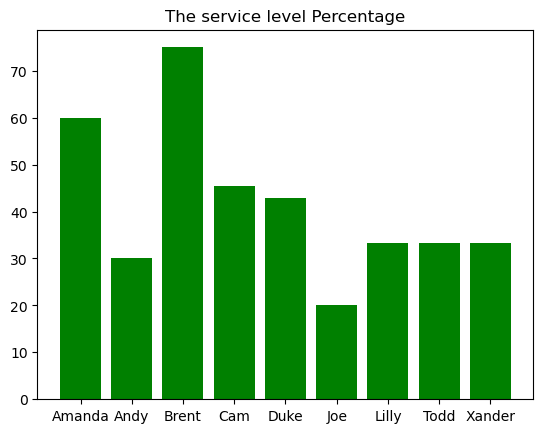

In [60]:
plt.bar(service_level['Rep ID'], service_level['Service Level %'], color = 'green')
plt.title('The service level Percentage')

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:
For Complaint there are  51  Incoming calls.
For product support there are 228 outgoing and 82 incoming calls.
For sales support they have 123 outgoing and 75 incoming callas

> Chart style you chose and why: Using grouped bar chart here.Comparison of Incoming and Outgoing with against call puropse becomes easier with grouped bar chart. 

<Axes: xlabel='Call Purpose'>

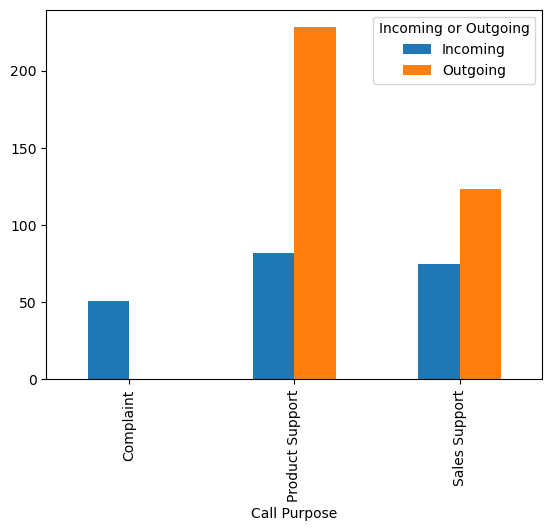

In [61]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
# print(purpose_counts)


complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
purpose_counts.unstack().plot(kind='bar')

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: Eventhough North has more service level than south, the number of calls attended is less than south.South has better average speed of calls than North.The abandoment rate is very less for each queue in south.Even 2 queues do not have abandoned calls at all. In my opinion all together south is performing more efficiently



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: North can benefit some more help.Their abandoment rate is more , can make the average speed better with additional help.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: I feel like if they had mentioned the result of success sales calls and the customer satisfacetion ,it would help us to evaluate the performance better.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
call_times
# Use groupby to plot based on time blocks:
call_times.groupby("Call Purpose").sum()

# Use groupby and get_group to select which call purpose to plot: